In [2]:
from ombre.query import get_nexsci
from ombre import Spectrum, Spectra
from astropy.io import fits
import matplotlib.pyplot as plt
import os
plt.style.use('seaborn-white')
from glob import glob
import numpy as np

In [3]:
from astropy.constants import G, k_B, m_p
import astropy.units as u
import numpy as np
def get_eqt(period, st_mass=1, st_rad=1, st_teff=5777, A=0.3):
    M = st_mass*u.solMass
    P = period*u.day
    R = st_rad*u.solRad
    T = st_teff*u.K
    a = (((G*M/(4*np.pi**2)) * P**2)**(1/3)).to(u.solRad)
    return T * np.sqrt(R/(2*a)) * (1 - A)**0.25

In [4]:
def get_H(teq, mass, rad):
    mu = m_p * 2
    g = ((G * mass * u.solMass)
        / (rad * u.solRad) ** 2
    ).to(u.m / u.s ** 2)
    return ((k_B * teq)/(mu * g)).to(u.km)

In [10]:
fnames = glob('results/*transmission.fits')
Hs = []
st_teffs = []
for idx, fname in enumerate(fnames):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten()
    teq = get_eqt(sp.meta['period'], sp.meta['st_mass'], sp.meta['st_rad'], sp.meta['st_teff']).value
    H = get_H(teq * u.K, sp.meta['mass'], sp.meta['radius']).value
    Hs.append(H)
    st_teffs.append(sp.meta['st_teff'])
    sp = sp.flatten().bin(np.linspace(0.7, 1.7, 300))
    x, y, ye = sp.wavelength.value, sp.spec.value, sp.spec_err.value

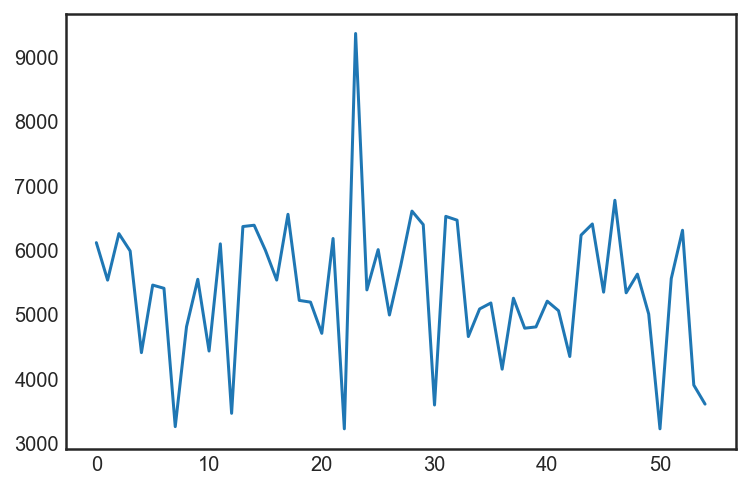

Text(0.5, 1.0, 'Exoplanet Atmosphere Transmission Spectra')

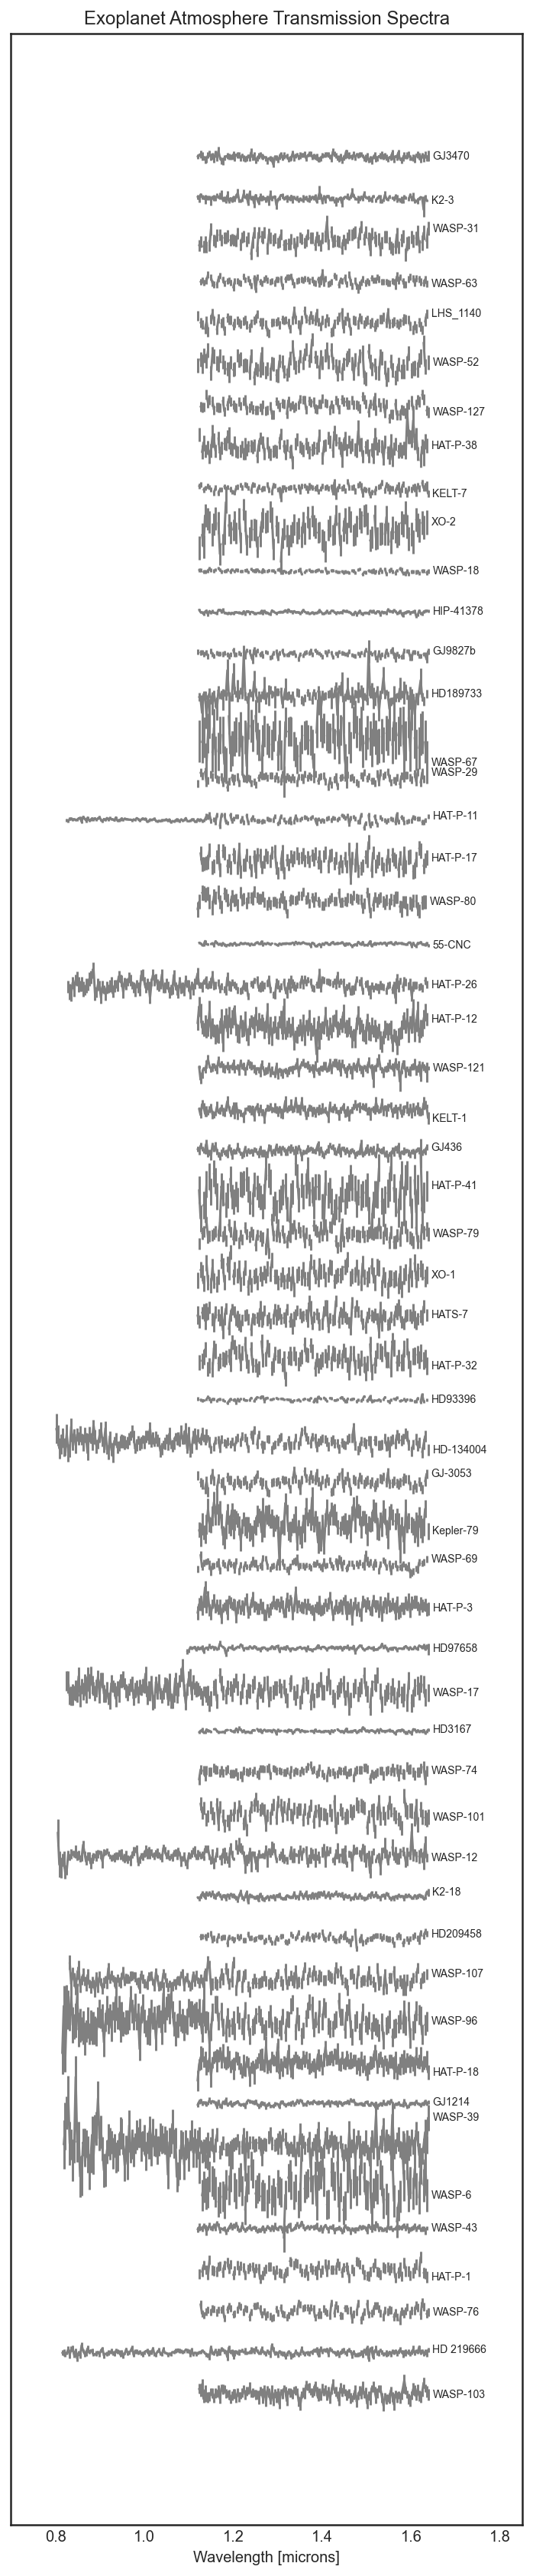

In [7]:
fig, axs = plt.subplots(1, 1, figsize=(6, 30))
for idx, fname in enumerate(glob('results/*transmission.fits')):
    name = '_'.join(fname.split('/')[1].split('_')[:-1])
    sp = Spectra.from_file(fname)
    sp = sp.flatten().bin(np.linspace(0.7, 1.7, 300))
    x, y, ye = sp.wavelength.value, sp.spec.value, sp.spec_err.value
    plt.errorbar(x, y + idx * 3000, ye, ms=0.1, color='grey', zorder=-1)
#    im = plt.scatter(x, y + idx * 3000, c=np.ones_like(y), vmin=3000, vmax=7000, cmap='coolwarm_r', s=5)
    plt.text(x[np.isfinite(y)][-1] + 0.01, y[np.isfinite(y)][-1] + idx * 3000, name, ha='left', va='center', size=7)
plt.xlim(0.7, 1.85)
plt.xlabel('Wavelength [microns]')
plt.yticks([])
#cbar = plt.colorbar(im)
#cbar.set_label('Stellar Temperature [K]')
plt.title('Exoplanet Atmosphere Transmission Spectra')